In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, f1_score
import pickle
import warnings
warnings.filterwarnings("ignore")

# Data Import

In [2]:
df = pd.read_csv('../hjbvl/Data Project/Dataset/creditcard_2023.csv')

The dataset is from Kaggle:
https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

# Data Description

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
print(df.shape)
df.info()

(568630, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 2

There are 29 features excluding 'id' and target variable, 'Class.'

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486122,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [9]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

Class 0 means non-fraudulent and 1 means fraudulent.
The dataset is balanced.

# Data Preprocessing

In [31]:
df = df.drop('id', axis = 1)

In [32]:
# Check if there are Missing values

df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
# Check duplicate values
df.duplicated().any()

True

There are no duplicates nor missing values.

## EDA

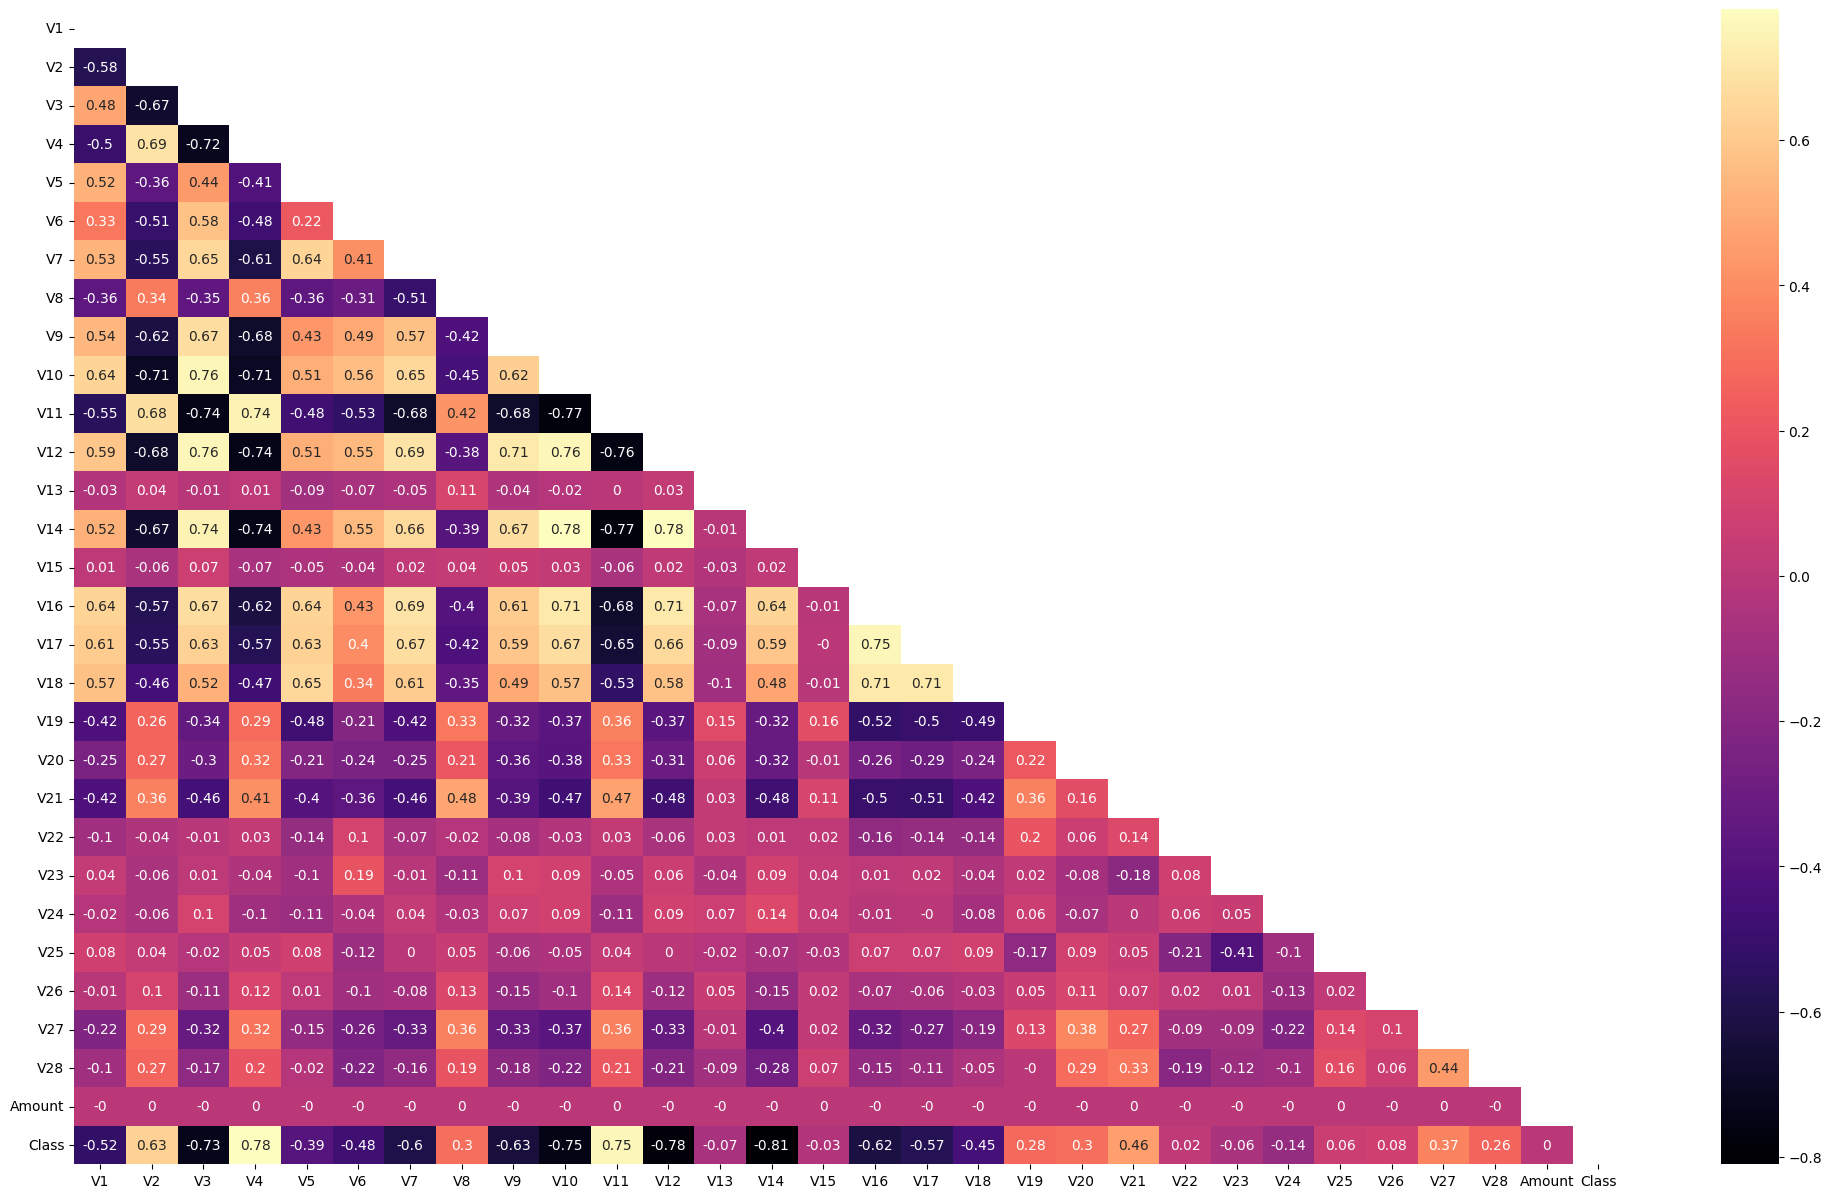

In [34]:
corr_df = df.corr(method = 'spearman').round(2)
mask = np.triu(np.ones_like(corr_df, dtype = bool))
plt.figure(figsize = [25, 15])
sns.heatmap(corr_df, cmap = sns.color_palette("magma", as_cmap = True), 
            annot = True, mask = mask)
plt.show()

Pearson Correlation Coefficient:
Measures the linear relationship between two variables.
Assumes that variables are normally distributed and have a linear relationship.
Sensitive to outliers.
Suitable for continuous variables that have a linear relationship.

Spearman Correlation Coefficient:
Measures the strength and direction of monotonic association between two variables.
Does not assume that variables are normally distributed.
Less sensitive to outliers compared to Pearson correlation.
Suitable for ordinal or non-normally distributed variables, or when the relationship is nonlinear but monotonic.

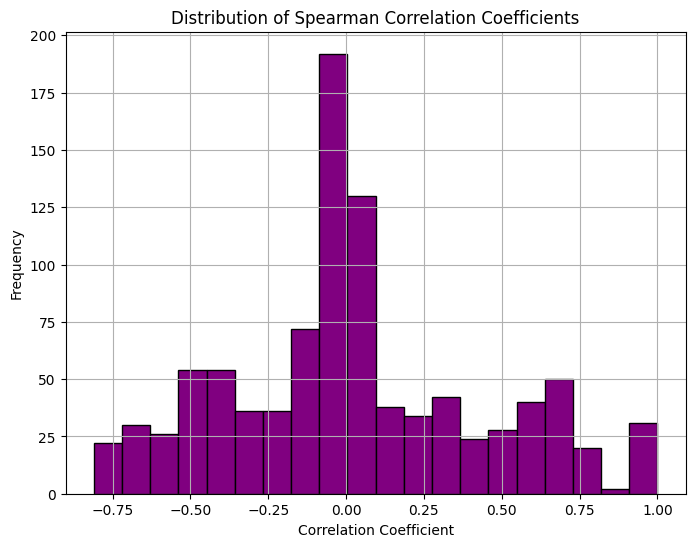

In [25]:
# Plot histogram of correlation coefficients
plt.figure(figsize=[8, 6])
plt.hist(corr_df.values.flatten(), bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Spearman Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Let's examine highly correlated and low correlated features. 
From the above histogram, I've categorized coefficients of 0.7 or higher as 'highly correlated' and coefficients of 0.1 or lower as 'low correlated'.

In [35]:
def generate_corr_mat(df, high=0.7, low=0.1):

    corr_mat = {'Parameter': [], 'Highly Correlated Parameters': [], 'Low Correlated Parameters': []}
    df = df.abs()
    cols = df.columns.tolist()
    for i, val in df.iterrows():
        highly_corr_params = [col for col in cols if val[col] > high and col != i]
        low_corr_params = [col for col in cols if val[col] < low]
        corr_mat['Parameter'].append(i)
        corr_mat['Highly Correlated Parameters'].append(", ".join(highly_corr_params))
        corr_mat['Low Correlated Parameters'].append(", ".join(low_corr_params))
    return corr_mat

correlation_matrix = generate_corr_mat(corr_df)

# Convert correlation matrix to DataFrame for tabular representation
corr_table_df = pd.DataFrame(correlation_matrix)

print(corr_table_df)


   Parameter           Highly Correlated Parameters  \
0         V1                                          
1         V2                                    V10   
2         V3          V4, V10, V11, V12, V14, Class   
3         V4          V3, V10, V11, V12, V14, Class   
4         V5                                          
5         V6                                          
6         V7                                          
7         V8                                          
8         V9                                    V12   
9        V10  V2, V3, V4, V11, V12, V14, V16, Class   
10       V11           V3, V4, V10, V12, V14, Class   
11       V12  V3, V4, V9, V10, V11, V14, V16, Class   
12       V13                                          
13       V14           V3, V4, V10, V11, V12, Class   
14       V15                                          
15       V16                     V10, V12, V17, V18   
16       V17                               V16, V18   
17       V

## Skewness of the features

In [36]:
df.skew().sort_values()

V20       -1.556460
V2        -1.397952
V6        -0.201611
V21       -0.108983
V23       -0.099687
V1        -0.083417
V4        -0.044169
V11       -0.020891
V26       -0.018959
V19       -0.010171
Class      0.000000
Amount     0.001656
V15        0.011233
V3         0.014622
V13        0.014906
V25        0.023008
V24        0.066090
V12        0.066759
V18        0.129191
V9         0.171057
V14        0.207835
V16        0.266407
V8         0.299972
V22        0.318529
V17        0.373061
V10        0.740414
V5         1.506414
V28        1.724978
V27        2.755452
V7        19.026866
dtype: float64

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and -0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

In [41]:
skewness = df.skew()

highly_skewed = []
moderately_skewed = []
fairly_symmetrical = []

for col in df.columns:
    if skewness[col] > 1 or skewness[col] < -1:
        highly_skewed.append(col)
    elif abs(skewness[col]) >= 0.5:
        moderately_skewed.append(col)
    else:
        fairly_symmetrical.append(col)

print(f"Highly skewed features: {', '.join(highly_skewed)}")
print(f"Moderately skewed features: {', '.join(moderately_skewed)}")
print(f"Fairly symmetrical features: {', '.join(fairly_symmetrical)}")

Highly skewed features: V2, V5, V7, V20, V27, V28
Moderately skewed features: V10
Fairly symmetrical features: V1, V3, V4, V6, V8, V9, V11, V12, V13, V14, V15, V16, V17, V18, V19, V21, V22, V23, V24, V25, V26, Amount, Class


### Visualization of skewed parameters

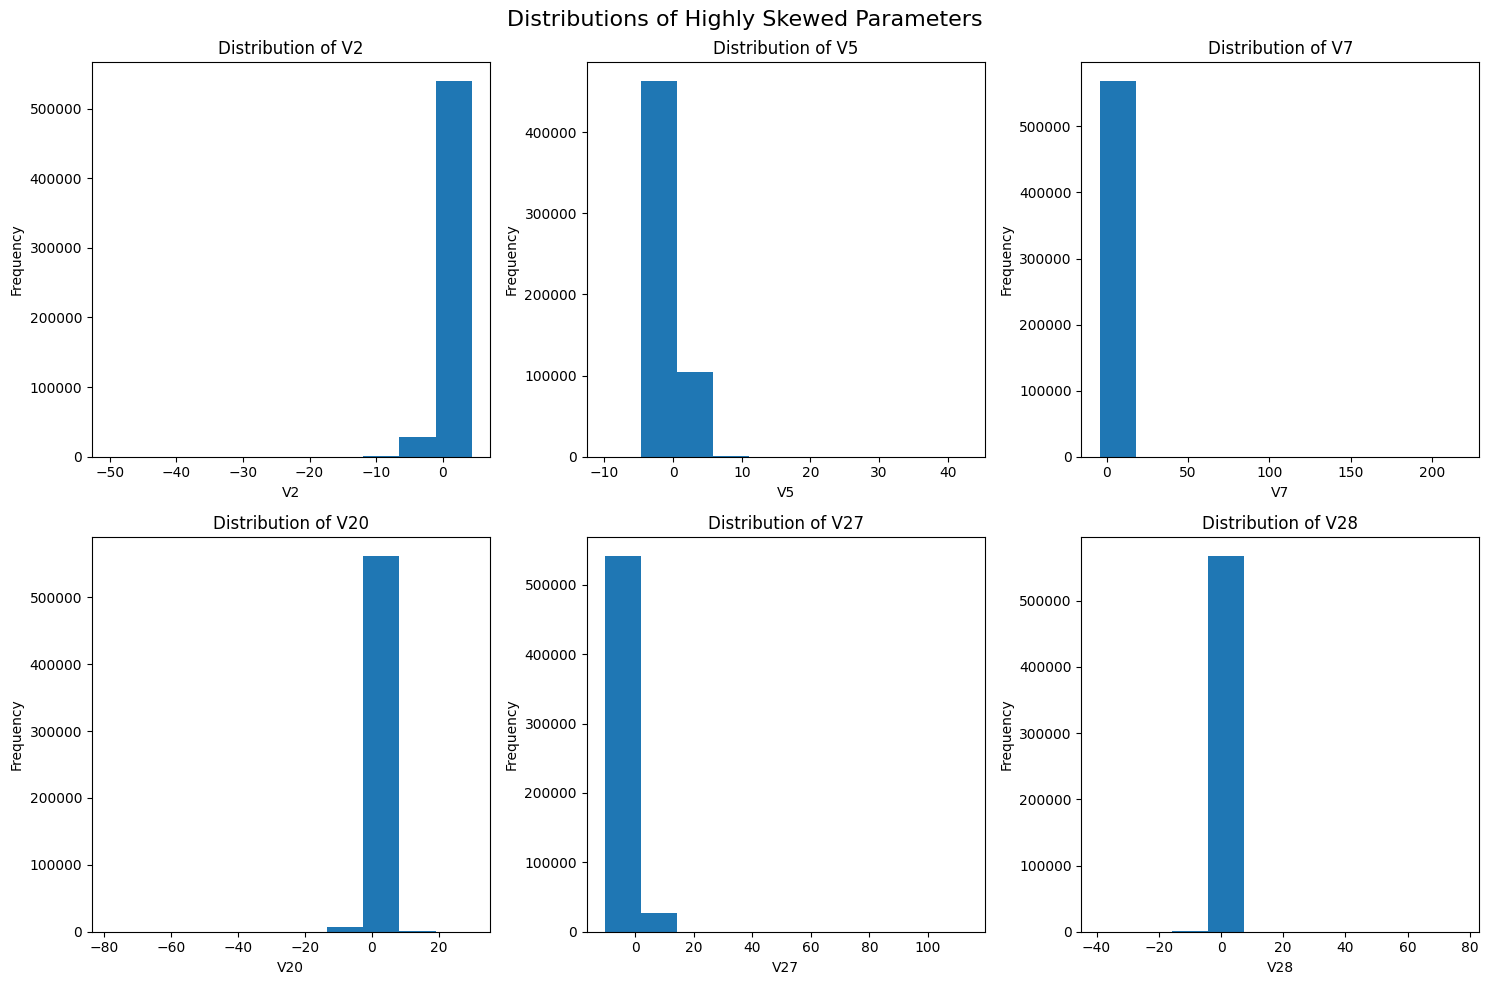

In [42]:
# Create subplots for highly skewed parameters
num_plots = len(highly_skewed)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division to get number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for highly skewed parameters
for i, col in enumerate(highly_skewed):
    df[col].plot(kind='hist', ax=axes[i], title=f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Set overall title and layout
plt.suptitle('Distributions of Highly Skewed Parameters', size=16)
plt.tight_layout()
plt.show()

All the highly skewed parameters exhibited values centered around 0, contributing to their skewed distribution.

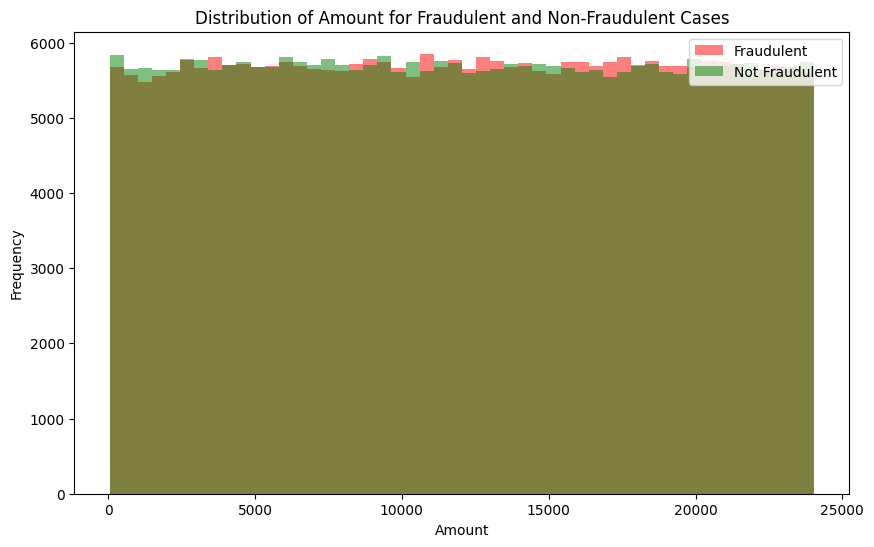

In [53]:
plt.figure(figsize=[10, 6])

# Plot histogram for fraudulent cases with red color and 50% opacity
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, color='red', alpha=0.5, label='Fraudulent')

# Plot histogram for non-fraudulent cases with green color and 50% opacity
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, color='green', alpha=0.5, label='Not Fraudulent')

plt.title('Distribution of Amount for Fraudulent and Non-Fraudulent Cases')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The distribution of the 'Amount' feature appears to be fairly normal for both classes.

# Data Preparation

In [71]:
X = df.drop(columns = ['Class'], axis = 1)
y = df['Class']

In [72]:
print(X.shape)
print(y.shape)

(568630, 29)
(568630,)


## Feature scaling

In [73]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


### Dimension Reduction - PCA

In [74]:
pca = PCA(n_components = 10)
X_new = pd.DataFrame(pca.fit_transform(X_scaled), columns = ['feature' + str(i) for i in range(10)])
X_new.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,2.190569,-0.164079,0.262988,0.912089,0.492634,-1.352312,-0.087032,-1.171576,-0.753292,-1.113209
1,2.085245,0.354986,0.169529,0.019766,0.123547,0.632693,-0.887741,0.287594,-0.297417,-0.334106
2,2.283198,-0.522318,-0.361641,0.380840,1.141472,-0.143166,-1.810374,0.294206,-1.550520,-1.231324
3,2.694945,0.107483,-0.256324,-1.140994,-0.683086,1.164675,-0.830754,0.526660,-1.482654,0.377410
4,2.048884,-0.354238,0.936483,0.979101,0.598682,0.897985,-0.767666,-1.032683,0.621016,0.607320


Reduced the dimensionality of the data features from 29 to 10.

## Data Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42, stratify = y)
cv = StratifiedKFold(n_splits = 8, shuffle = True)

In [80]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(454904, 10)
(454904,)
(113726, 10)
(113726,)


# Modeling

In [81]:
def train_model(model, X_train, y_train, X_test, y_test):
    # Fit model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    
    #Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print('Accuracy: ', accuracy)
    print('F1 score: ', f1)
    print('AUC(ROC): ', roc_auc)
    print()
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    ## ROC AUC
    prob = model.predict_proba(X_test)
    prob = prob[:, 1]
    fper, tper, _ = roc_curve(y_test, prob)
    auc_scr = auc(fper, tper)
    
    fig, axes = plt.subplots(1, 2, figsize = (12, 6))
    axes[0].plot(fper, tper, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % auc_scr)
    axes[0].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend(loc = 'lower right')
    sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1], annot = True, cbar = False)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')
    
    plt.show()
    
    # Return evaluation metrics
    return model, accuracy, f1, roc_auc

## Logistic Regression

Accuracy:  0.9520690079665161
F1 score:  0.9520367573104624
AUC(ROC):  0.952069007966516

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.98      0.93      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



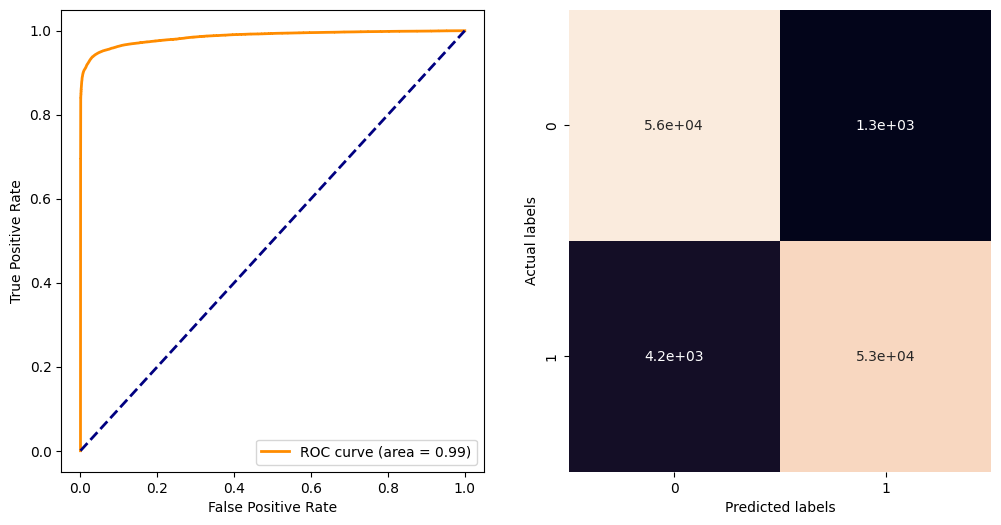

In [82]:
lr = LogisticRegression()
time_start = time.time()
lr, acc_lr, f1_lr, roc_auc_lr = train_model(lr, X_train, y_train, X_test, y_test)
time_taken_lr = time.time() - time_start

## Decision Tree

Accuracy:  0.994469162724443
F1 score:  0.9944691560426671
AUC(ROC):  0.994469162724443

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.99      1.00      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



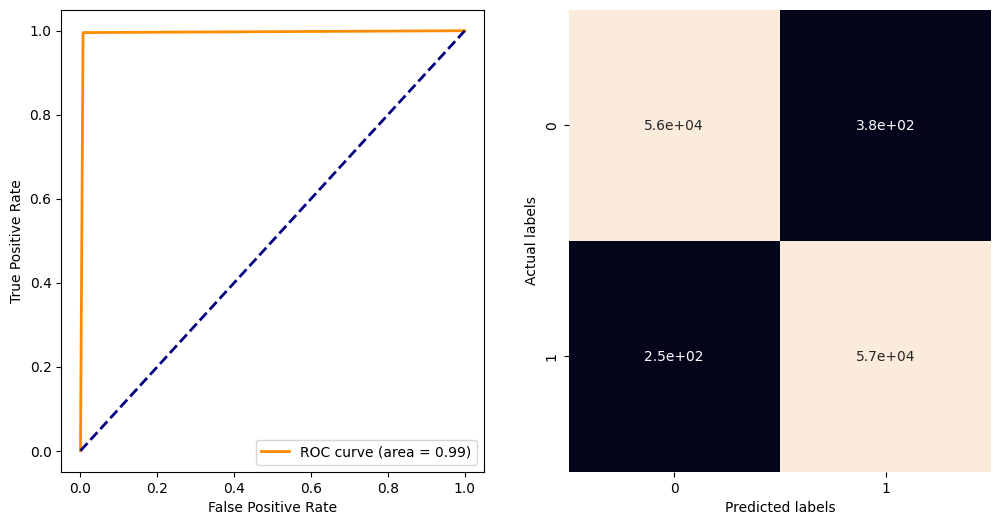

In [83]:
dt = DecisionTreeClassifier()
time_start = time.time()
dt, acc_dt, f1_dt, roc_auc_dt = train_model(dt, X_train, y_train, X_test, y_test)
time_taken_dt = time.time() - time_start

## Random Forest

Accuracy:  0.9989887976364243
F1 score:  0.9989887976138292
AUC(ROC):  0.9989887976364243

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



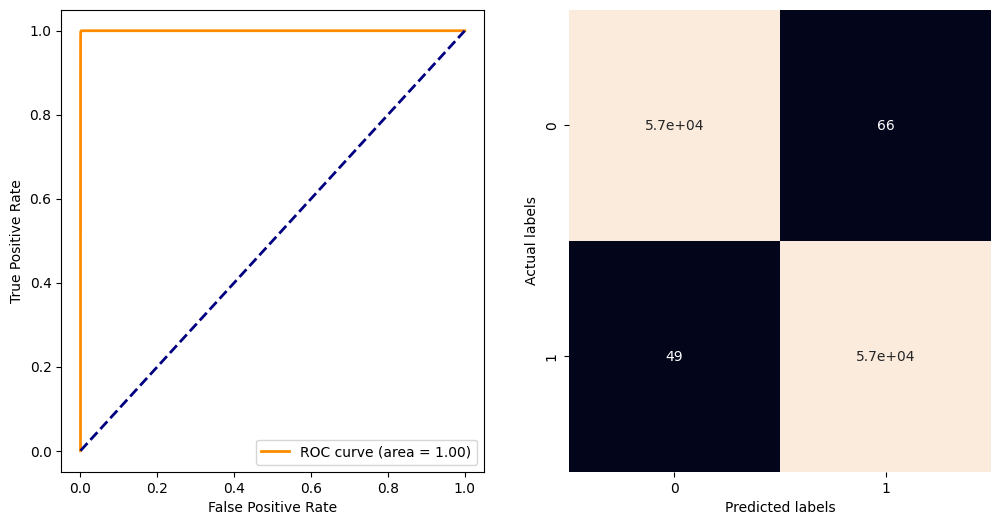

In [84]:
rf = RandomForestClassifier()
time_start = time.time()
rf, acc_rf, f1_rf, roc_auc_rf = train_model(rf, X_train, y_train, X_test, y_test)
time_taken_rf = time.time() - time_start

# Conclusion

In [85]:
accuracies = [acc_lr, acc_dt, acc_rf]
f_score = [f1_lr, f1_dt, f1_rf, ]
roc_auc = [roc_auc_lr, roc_auc_dt, roc_auc_rf]
time = [time_taken_lr, time_taken_dt, time_taken_rf]

results = pd.DataFrame({"Accuracies": accuracies, "F1 Scores": f_score, "ROC AUC": roc_auc, "Time Taken": time}, 
                       index = ['LogisticReg', 'DecisionTree', 'RandomForest'])
results = results.round(4)
results

,Accuracies,F1 Scores,ROC AUC,Time Taken
LogisticReg,0.9521,0.9520,0.9521,1.3285
DecisionTree,0.9945,0.9945,0.9945,20.3147
RandomForest,0.9990,0.9990,0.9990,427.8453


* All three models achieved high accuracy and performance, with random forest being the best-performing model in terms of accuracy, F1 score, and ROC AUC score. 
* However, the choice of model also depends on the trade-off between performance and training time, where logistic regression might be preferred if faster inference time is required, while random forest might be preferred for higher accuracy despite longer training time.